In [1]:
from PandaSQLite import PandaSQLiteDB
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.colors import LogNorm
import matplotlib.ticker as ticker
import matplotlib.patches as patches


In [2]:
db = PandaSQLiteDB("quicksort.sql", auto_commit=False)

In [3]:
db.query("SELECT * FROM data WHERE n_threads = 1")

n_threads       size      time
0          1   10000000   11779.4
1          1   20000000   24625.8
2          1   40000000   50243.0
3          1   80000000  105175.0
4          1  160000000  217515.0
5          1  320000000  450199.0

In [7]:
q = ""
for index, row in db.query("SELECT * FROM data WHERE n_threads = 1").iterrows():
    size = row['size']
    time = row['time']
    if size != 1:
        q += f"SELECT n_threads as Threads, size/10000000 as Size, {time}/time as Speedup FROM data WHERE size = {size} UNION "
    else:
        q += f"SELECT n_threads as Threads, size/10000000 as Size, time as Speedup FROM data WHERE size = {size} UNION "
q = q[:len(q) - len(" UNION ")]

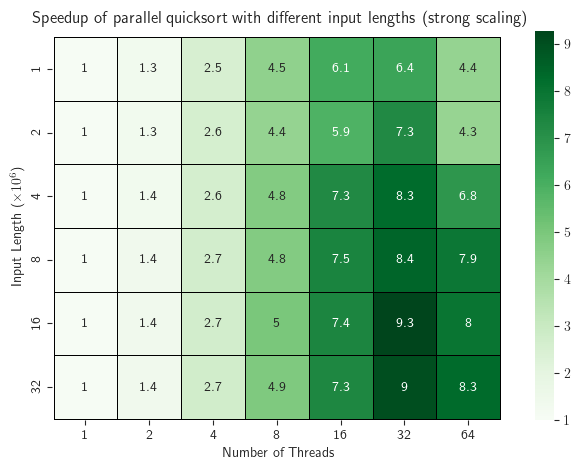

In [8]:
# Create the heatmap using Seaborn's heatmap function
plt.rcParams['text.usetex'] = True
df = db.query(q)
cmap_colors = sns.color_palette("Greens", n_colors=200).as_hex()
heatmap_data = df.pivot(index='Size', columns='Threads', values='Speedup')
ax = sns.heatmap(heatmap_data, cmap=cmap_colors, annot=True, linewidth=.5, linecolor='black')

# Add labels and title
plt.xlabel('Number of Threads')
plt.ylabel('Input Length ($\\times 10^6$)')
plt.title("Speedup of parallel quicksort with different input lengths (strong scaling)")

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.02, top - 0.1)

left, right = ax.get_xlim()
ax.set_xlim(left-0.02, right + 0.1)
plt.tight_layout()
plt.savefig(f"quicksort_strong_heatmap.pdf")



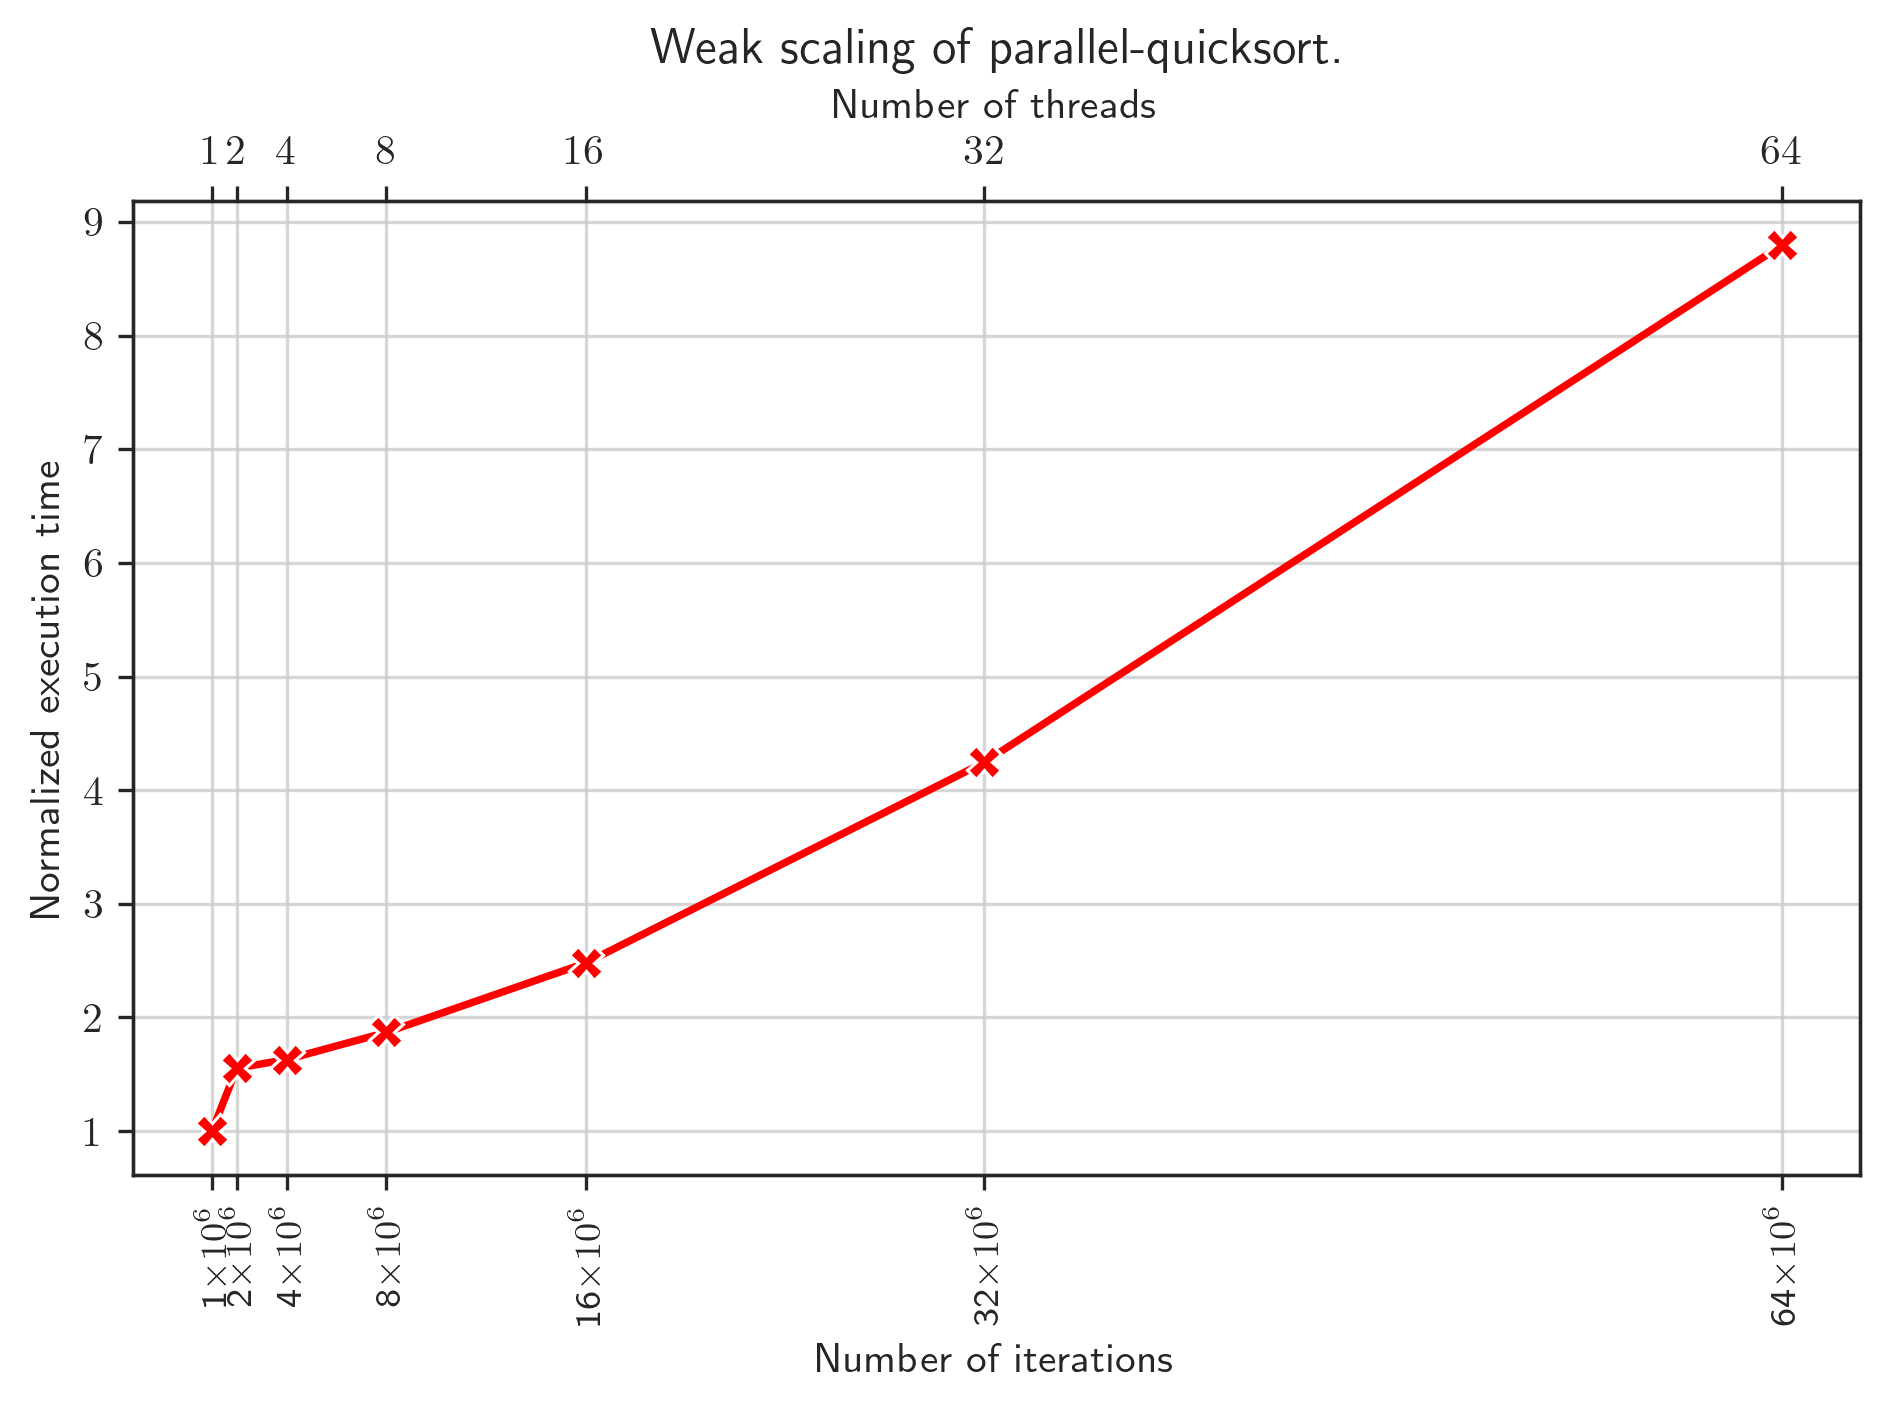

In [6]:

f, ax = plt.subplots(dpi=300)
plt.rcParams['text.usetex'] = True
sns.set_style("ticks")
pal = sns.color_palette("bright")
colors = pal.as_hex()
colors[5] = "#57b3e9"

sns.lineplot(
    data=db.query("SELECT size as Size, time/11779.4 as Time, n_threads as Threads FROM weak"),
    x="Threads",
    y="Time",
    linewidth=1.8,
    color="red",
    # hue="Algorithm",
    # style="Algorithm",
    marker="X",
    markersize=8,
    #
    errorbar=None,
    ax=ax
).set_title("Weak scaling of parallel-quicksort.")

plt.grid(alpha=0.8)
#ax.set_xscale('log', base=2)
#sns.move_legend(ax, "upper left")
#plt.rcParams["font.serif"] = "Times New Roman"
ax.set(ylabel=r'Normalized execution time', xlabel=r'Number of iterations')
#plt.xticks([2**i for i in range(1,7)], [f"${2**i}$\n $N={2**i}\\times 10^6$" for i in range(1,7)])
ax.set_xticks([2**i for i in range(7)], [f"{2**i}$\\times 10^6$" for i in range(7)], rotation="vertical")
top_ax = ax.twiny()
top_ax.set_xlim(ax.get_xlim())
top_ax.set_xticks([2**i for i in range(7)])
top_ax.set(xlabel=r'Number of threads')

ax.tick_params(axis='x', which='major', labelsize=9)
top_ax.tick_params(axis='x', which='major', labelsize=10)
plt.tight_layout()

plt.savefig(f"par_pi_weak_scaling.pdf")


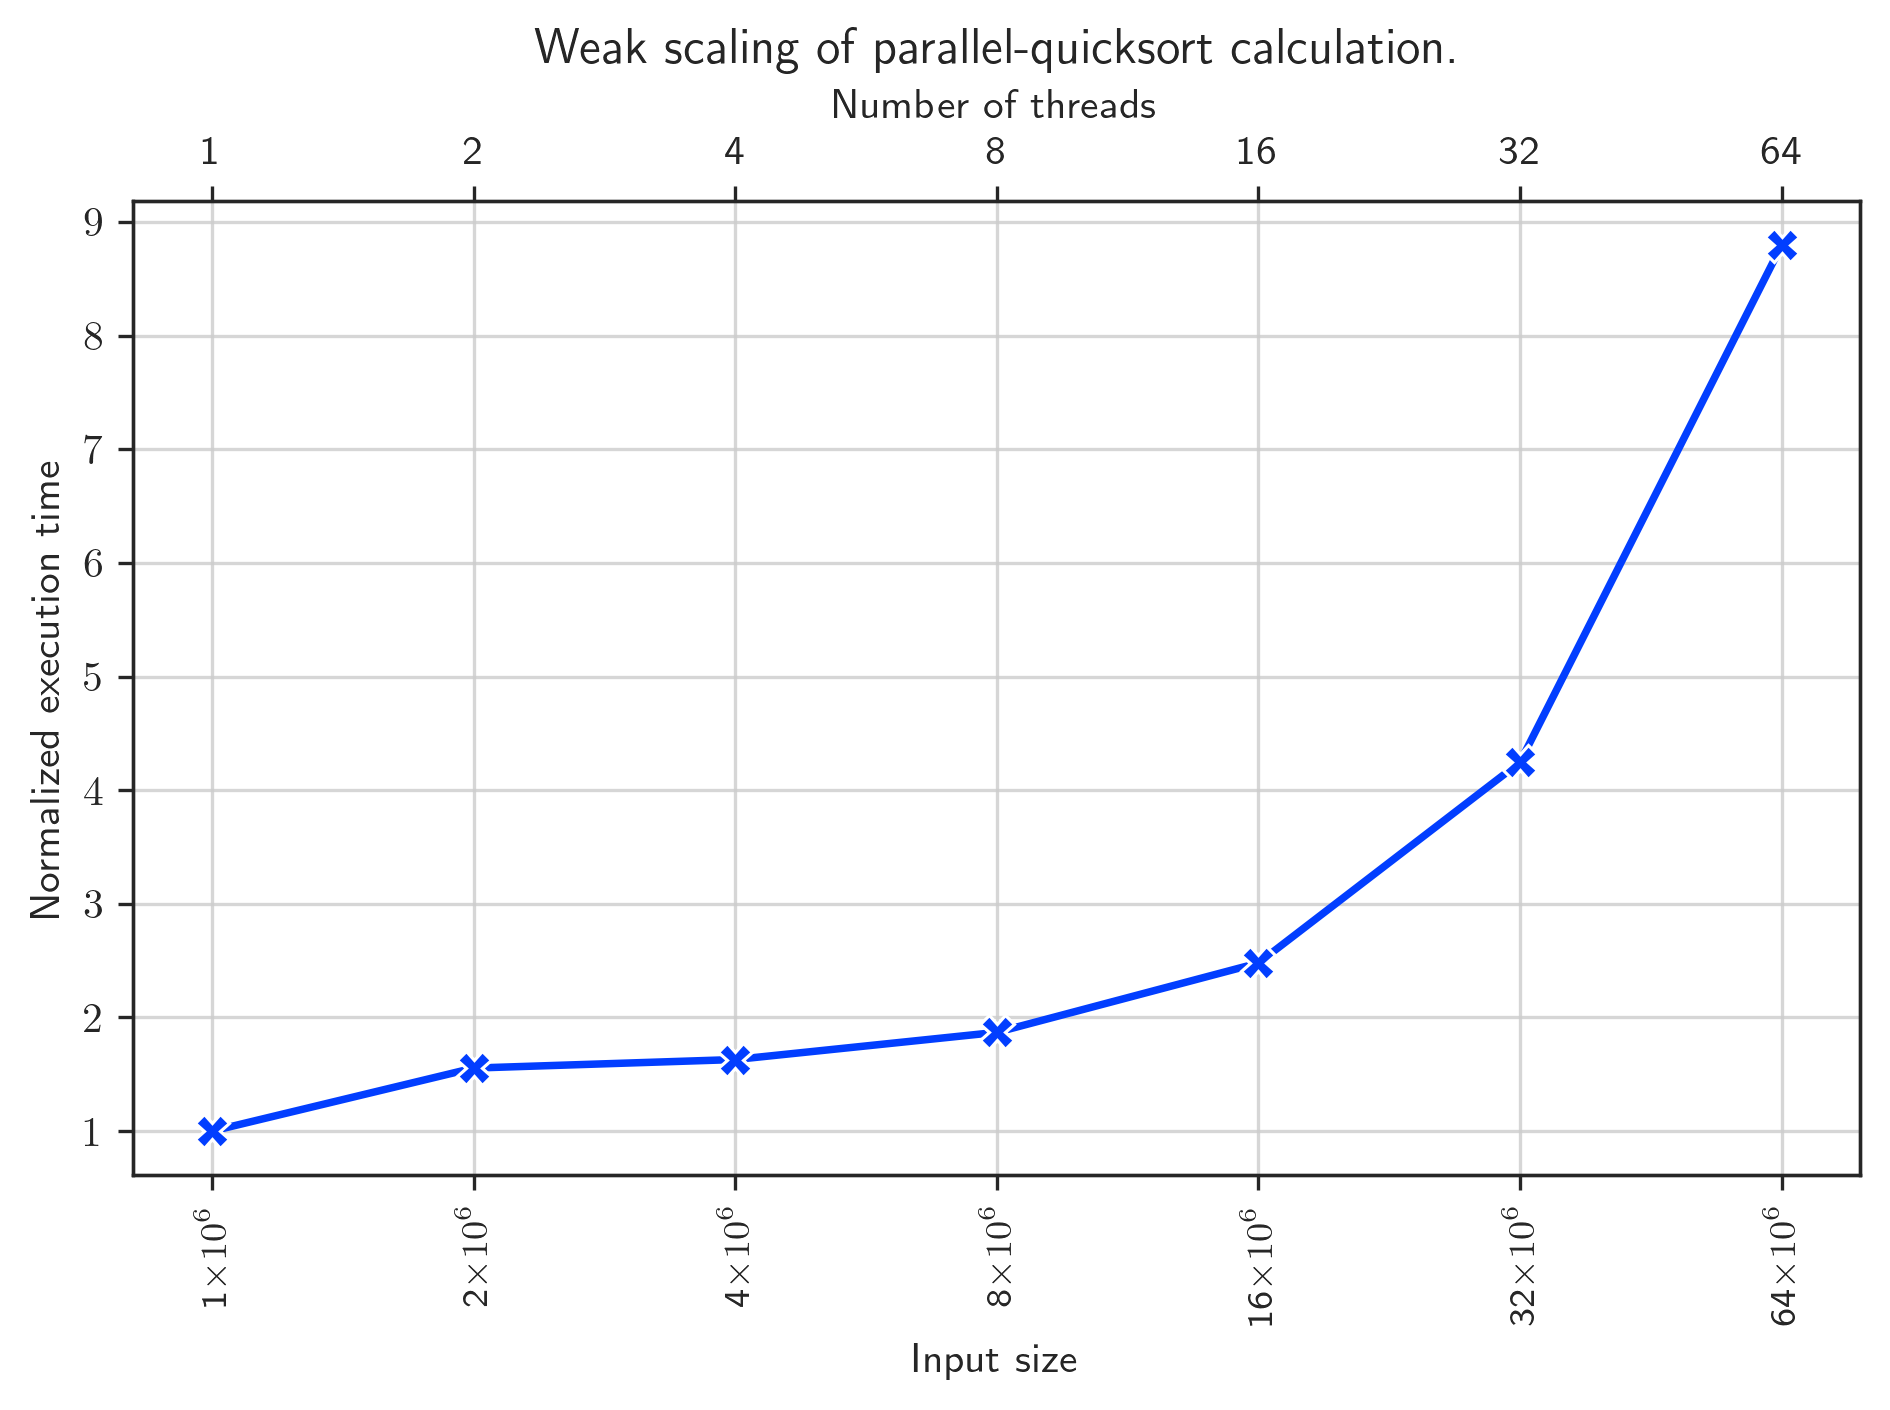

In [98]:

f, ax = plt.subplots(dpi=300)
plt.rcParams['text.usetex'] = True
sns.set_style("ticks")
pal = sns.color_palette("bright")
colors = pal.as_hex()
colors[5] = "#57b3e9"

sns.lineplot(
    data=db.query("SELECT size as Size, time/11779.4 as Time, n_threads as Threads FROM weak"),
    x="Threads",
    y="Time",
    linewidth=1.8,
    color=colors[0],
    # hue="Algorithm",
    # style="Algorithm",
    marker="X",
    markersize=8,
    errorbar=None,
    ax=ax
).set_title("Weak scaling of parallel-quicksort calculation.")

plt.grid(alpha=0.8)
ax.set_xscale('log', base=2)
#sns.move_legend(ax, "upper left")
#plt.rcParams["font.serif"] = "Times New Roman"
ax.set(ylabel=r'Normalized execution time', xlabel=r'Input size')
#plt.xticks([2**i for i in range(1,7)], [f"${2**i}$\n $N={2**i}\\times 10^6$" for i in range(1,7)])
top_ax = ax.twiny()
top_ax.set_xscale('log', base=2)
ax.set_xticks([2**i for i in range(7)], [f"{2**i}$\\times 10^6$" for i in range(7)], rotation="vertical")
top_ax.set_xlim(ax.get_xlim())
top_ax.set_xticks([2**i for i in range(7)],  [f"{2**i}" for i in range(7)])
top_ax.set(xlabel=r'Number of threads')


ax.tick_params(axis='x', which='major', labelsize=9)
top_ax.tick_params(axis='x', which='major', labelsize=10)
plt.tight_layout()

plt.savefig(f"par_quicksort_weak_scaling.svg", format="svg")


In [74]:

db.commit()

In [75]:
db.get_table("weak")

n_threads       size      time
0          1   10000000   11779.4
1          2   20000000   18311.8
2          4   40000000   19198.4
3          8   80000000   22016.8
4         16  160000000   29199.6
5         32  320000000   50009.7
6         64  640000000  103586.0